In [29]:
import riotwatcher as rt
import creds

conecct = rt.LolWatcher(creds.riot_API_key)
conecct

Extraer info champ

In [30]:
me = conecct.summoner
the_name = "Antthoss"
me = me.by_name(region = "la1",summoner_name=the_name)
me

{'id': 'lSxjo9PcLdqfX0xNdRtqCqsJs-wluUYc81ZQgZ1zz1LHzEaaQvJ_vDD2zA',
 'accountId': 'ISVeKqcd5Vqevl6nzh_jdqnWoTSghH4OVu4z1hwgZz-EVfeQ6E9DH5Dt',
 'puuid': '_ROPUnorv3aVovk2pvxxKOpkipZxHUZJH-yOToXlJLZ7397Ubg0R_NJS3H4rG_RjgpidV1dVBkveOA',
 'name': 'Antthoss',
 'profileIconId': 987,
 'revisionDate': 1664081695000,
 'summonerLevel': 58}

In [31]:
match = conecct.match

In [32]:
list_matches = match.matchlist_by_puuid(region="la1",puuid=me["puuid"],count=100)

In [33]:
partida_prueba = match.by_id(region="la1",match_id=list_matches[2])

In [34]:
partida_prueba["info"]["participants"][0]["summonerName"]
for name in partida_prueba["info"]["participants"]:
    if(name["summonerName"] == the_name):
        me = name
danio = me["totalDamageDealt"]
champ = me["championName"]

In [35]:
list_danio = []
list_champs = []
dic_danio = {}

for partida in list_matches:
    partida_id = match.by_id(region="la1",match_id=partida)
    for name in partida_id["info"]["participants"]:
        lista_campeones = dic_danio.keys()
        if(name["summonerName"] == the_name):
            me = name
    if(me["championName"] in lista_campeones):
        danio = dic_danio[me["championName"]] + me["totalDamageDealtToChampions"]
        temp_dic = {me["championName"]:danio}
    else:
        temp_dic = {me["championName"]:me["totalDamageDealtToChampions"]}
    dic_danio.update(temp_dic)

In [36]:
partida_id["info"]["participants"]

[{'assists': 8,
  'baronKills': 0,
  'basicPings': 10,
  'bountyLevel': 0,
  'challenges': {'12AssistStreakCount': 0,
   'abilityUses': 233,
   'acesBefore15Minutes': 0,
   'alliedJungleMonsterKills': 5.5,
   'baronTakedowns': 0,
   'blastConeOppositeOpponentCount': 0,
   'bountyGold': 150,
   'buffsStolen': 0,
   'completeSupportQuestInTime': 0,
   'controlWardsPlaced': 0,
   'damagePerMinute': 400.08495576877147,
   'damageTakenOnTeamPercentage': 0.25594949821629026,
   'dancedWithRiftHerald': 0,
   'deathsByEnemyChamps': 7,
   'dodgeSkillShotsSmallWindow': 1,
   'doubleAces': 0,
   'dragonTakedowns': 0,
   'earlyLaningPhaseGoldExpAdvantage': 0,
   'effectiveHealAndShielding': 1935.2132568359375,
   'elderDragonKillsWithOpposingSoul': 0,
   'elderDragonMultikills': 0,
   'enemyChampionImmobilizations': 6,
   'enemyJungleMonsterKills': 0,
   'epicMonsterKillsNearEnemyJungler': 0,
   'epicMonsterKillsWithin30SecondsOfSpawn': 0,
   'epicMonsterSteals': 0,
   'epicMonsterStolenWithoutSmi

In [37]:
dic_danio

{'Hecarim': 71375,
 'Sejuani': 113306,
 'Maokai': 125805,
 'Graves': 243961,
 'Nocturne': 116399,
 'Gragas': 121875,
 'MonkeyKing': 39173,
 'Vi': 68847,
 'Rammus': 25839,
 'XinZhao': 123249,
 'Poppy': 43173,
 'Udyr': 46590,
 'JarvanIV': 56908,
 'Trundle': 43176,
 'Kayn': 19127,
 'Lillia': 48706,
 'TwistedFate': 6358,
 'FiddleSticks': 9249}

##### Obtener el daño de las 20 partidas

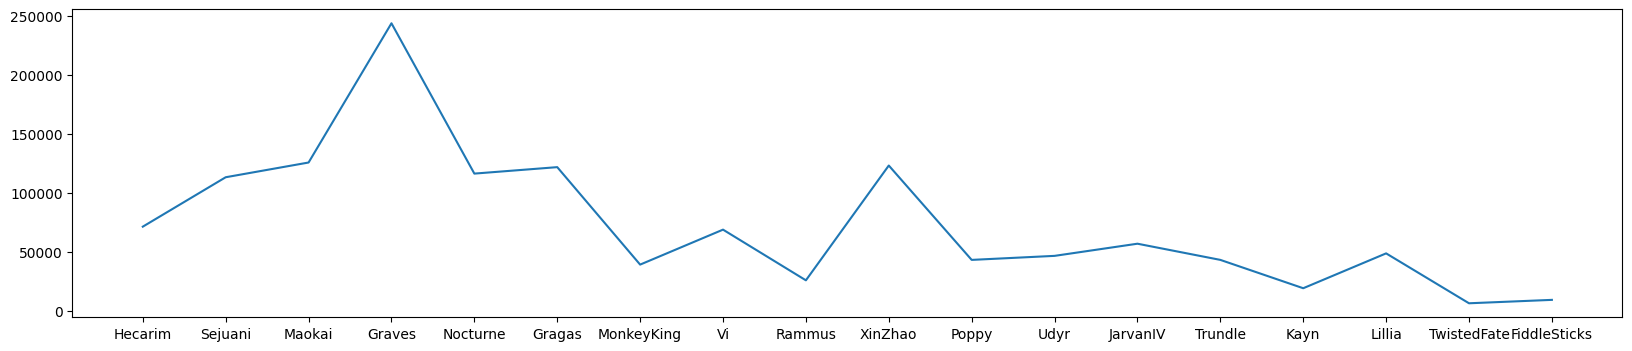

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.plot(dic_danio.keys(),dic_danio.values())
plt.show()